In [9]:
import os
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import pearsonr


def custom_sum(delta_materials_row):
    total = 0
    for val in delta_materials_row:
        if val == 4:
            total += 3
        else:
            total += val
    return total

def custom_max(delta_materials_row):
    max_val = max(delta_materials_row)
    return 3 if max_val == 4 else max_val

def custom_immediate_val_1(delta_materials_row):
    return 3 if delta_materials_row[0] == 4 else delta_materials_row[0]

def custom_immediate_val_2(delta_materials_row):
    return 3 if delta_materials_row[1] == 4 else delta_materials_row[1]

def custom_immediate_val_3(delta_materials_row):
    return 3 if delta_materials_row[2] == 4 else delta_materials_row[2]

def active_material_sum(delta_materials, move_match):
    active_material_sum_hm = defaultdict(list)    # {sum : [total_correct, total]}
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        active_material_sum = custom_sum(active_player_delta)
        if active_material_sum not in active_material_sum_hm:
            active_material_sum_hm[active_material_sum] = [0, 0]
        
        if move_match[i] == 1:
            active_material_sum_hm[active_material_sum][0] += 1
            active_material_sum_hm[active_material_sum][1] += 1
        else:
            active_material_sum_hm[active_material_sum][1] += 1
    
    active_material_sums, accuracies = [], []
    for active_material_sum, [total_correct, total] in active_material_sum_hm.items():
        active_material_sums.append(active_material_sum)
        accuracies.append(total_correct / total)
    
    correlation_coefficient, p_val = pearsonr(active_material_sums, accuracies)
    return [np.array(active_material_sums), np.array(accuracies), correlation_coefficient, p_val]


def active_material_max(delta_materials, move_match):
    active_material_max_hm = defaultdict(list)    # {max : [total_correct, total]}
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        active_material_max = custom_max(active_player_delta)
        if active_material_max not in active_material_max_hm:
            active_material_max_hm[active_material_max] = [0, 0]
        
        if move_match[i] == 1:
            active_material_max_hm[active_material_max][0] += 1
            active_material_max_hm[active_material_max][1] += 1
        else:
            active_material_max_hm[active_material_max][1] += 1
    
    active_material_maxes, accuracies = [], []
    for active_material_max, [total_correct, total] in active_material_max_hm.items():
        active_material_maxes.append(active_material_max)
        accuracies.append(total_correct / total)
        
    correlation_coefficient, p_val = pearsonr(active_material_maxes, accuracies)
    return [np.array(active_material_maxes), np.array(accuracies), correlation_coefficent, p_val]


def active_material_loss(delta_materials, move_match):
    active_material_loss_hm = defaultdict(list)
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        active_material_loss = custom_sum(active_player_delta) - custom_sum(opponent_delta)
        if active_material_loss not in active_material_loss_hm:
            active_material_loss_hm[active_material_loss] = [0, 0]
            
        if move_match[i] == 1:
            active_material_loss_hm[active_material_loss][0] += 1
            active_material_loss_hm[active_material_loss][1] += 1
        else:
            active_material_loss_hm[active_material_loss][1] += 1
            
    active_material_losses, accuracies = [], []
    for active_material_loss, [total_correct, total] in active_material_loss_hm.items():
        active_material_losses.append(active_material_loss)
        accuracies.append(total_correct / total)
        # print("print:", active_material_loss, total_correct, total, total_correct/total)
    
    correlation_coefficient, p_val = pearsonr(active_material_losses, accuracies)
    return [np.array(active_material_losses), np.array(accuracies), correlation_coefficient, p_val]

def active_immediate_loss_1(delta_materials, move_match):
    active_immediate_loss_hm = defaultdict(list)
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        immediate_loss = custom_immediate_val_1(active_player_delta) - custom_immediate_val_1(opponent_delta)
        if immediate_loss not in active_immediate_loss_hm:
            active_immediate_loss_hm[immediate_loss] = [0, 0]
            
        if move_match[i] == 1:
            active_immediate_loss_hm[immediate_loss][0] += 1
            active_immediate_loss_hm[immediate_loss][1] += 1
        else:
            active_immediate_loss_hm[immediate_loss][1] += 1
            
    active_immediate_losses, accuracies = [], []
    for active_immediate_loss, [total_correct, total] in active_immediate_loss_hm.items():
        active_immediate_losses.append(active_immediate_loss)
        accuracies.append(total_correct / total)
        # print("print:", active_immediate_loss, total_correct, total, total_correct/total)
        
    correlation_coefficient, p_val = pearsonr(active_immediate_losses, accuracies)
    return [np.array(active_immediate_losses), np.array(accuracies), correlation_coefficient, p_val]

# make this immediate loss plot for depths 3-4 (2nd move of each player) and depths 5-6 (3rd move of each player)
def active_immediate_loss_2(delta_materials, move_match):
    active_immediate_loss_hm = defaultdict(list)
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        immediate_loss = custom_immediate_val_2(active_player_delta) - custom_immediate_val_2(opponent_delta)
        if immediate_loss not in active_immediate_loss_hm:
            active_immediate_loss_hm[immediate_loss] = [0, 0]
            
        if move_match[i] == 1:
            active_immediate_loss_hm[immediate_loss][0] += 1
            active_immediate_loss_hm[immediate_loss][1] += 1
        else:
            active_immediate_loss_hm[immediate_loss][1] += 1
            
    active_immediate_losses, accuracies = [], []
    for active_immediate_loss, [total_correct, total] in active_immediate_loss_hm.items():
        active_immediate_losses.append(active_immediate_loss)
        accuracies.append(total_correct / total)
        # print("print:", active_immediate_loss, total_correct, total, total_correct/total)
    correlation_coefficient, p_val = pearsonr(active_immediate_losses, accuracies)
    return [np.array(active_immediate_losses), np.array(accuracies), correlation_coefficient, p_val]

def active_immediate_loss_3(delta_materials, move_match):
    active_immediate_loss_hm = defaultdict(list)
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        immediate_loss = custom_immediate_val_3(active_player_delta) - custom_immediate_val_3(opponent_delta)
        if immediate_loss not in active_immediate_loss_hm:
            active_immediate_loss_hm[immediate_loss] = [0, 0]
            
        if move_match[i] == 1:
            active_immediate_loss_hm[immediate_loss][0] += 1
            active_immediate_loss_hm[immediate_loss][1] += 1
        else:
            active_immediate_loss_hm[immediate_loss][1] += 1
            
    active_immediate_losses, accuracies = [], []
    for active_immediate_loss, [total_correct, total] in active_immediate_loss_hm.items():
        active_immediate_losses.append(active_immediate_loss)
        accuracies.append(total_correct / total)
        # print("print:", active_immediate_loss, total_correct, total, total_correct/total)
    correlation_coefficient, p_val = pearsonr(active_immediate_losses, accuracies)
    return [np.array(active_immediate_losses), np.array(accuracies), correlation_coefficient, p_val]

In [11]:
# Blitz time control: 3 minutes
# results_folder_only_time_blitz = r'/scratch/gpfs/allenwu/'
results_folder_only_time_blitz = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_blitz_time_translated'

job_indices_hm = defaultdict(list)
moves_per_run = 30000
n_total_runs = 300

for i in range(0, n_total_runs):
    start_idx = i * moves_per_run
    end_idx = ((i+1)*moves_per_run) - 1
    job_indices_hm[i] = [start_idx, end_idx]
    
# Iterate over the sorted hm and save the files
all_delta_materials_blitz = []
all_move_matches_blitz = []        
for job_idx, [start_idx, end_idx] in job_indices_hm.items():
    if job_idx == 0:
        continue
        
    delta_materials_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_delta_materials.npy'
    move_match_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_move_match.npy'

    delta_materials_path_blitz = os.path.join(results_folder_only_time_blitz, delta_materials_file_name)
    # Load the delta_materials array from the file
    with open(delta_materials_path_blitz, 'rb') as f:
        delta_materials_blitz = np.load(f, allow_pickle=True)
        all_delta_materials_blitz.append(delta_materials_blitz)

    move_match_path_blitz = os.path.join(results_folder_only_time_blitz, move_match_file_name)
    # Load the move_mtach array from the file
    with open(move_match_path_blitz, 'rb') as f:
        move_matches_blitz = np.load(f, allow_pickle=True)
        all_move_matches_blitz.append(move_matches_blitz)
          
# Concatenate all delta_materials arrays into a single array
combined_delta_materials_blitz = np.concatenate(all_delta_materials_blitz)
print(combined_delta_materials_blitz.shape)
# print(combined_delta_materials)

# Concatenate all move_match arrays into a single array
combined_move_matches_blitz = np.concatenate(all_move_matches_blitz)
print(combined_move_matches_blitz.shape)
# print(combined_move_matches)

(988593, 36)
(988593,)


In [12]:
# remove 0th, 6th, 12th, 18th, 24th, 30th columns (all cases where nothing is captured across 6 depths)
# only need to run once every time combined_delta_materials is constructed from scratch
combined_delta_materials_blitz = np.delete(combined_delta_materials_blitz, [0,6,12,18,24,30], axis=1)

In [14]:
import numpy as np
import statsmodels.api as sm

# Reshape combined_move_match to match the shape of translated_delta_materials
combined_move_matches_blitz = combined_move_matches_blitz.reshape(-1, 1)

# Add constant term for intercept
combined_delta_materials_blitz_with_const = sm.add_constant(combined_delta_materials_blitz)
combined_delta_materials_blitz_with_const = np.array(combined_delta_materials_blitz_with_const, dtype=float)

# Create and fit the logistic regression model
logit_model_blitz = sm.Logit(combined_move_matches_blitz, combined_delta_materials_blitz_with_const)
logit_result_blitz = logit_model_blitz.fit()

# Retrieve the coefficients (beta weights) from the trained model
beta_weights_blitz = logit_result_blitz.params[1:]  # Exclude the intercept
intercept_blitz = logit_result_blitz.params[0]

# Reshape beta_weights for interpretation
beta_weights_blitz = beta_weights_blitz.reshape(6, 5)

print("Beta Weights:")
print(beta_weights_blitz)
print("Intercept:", intercept_blitz)

Optimization terminated successfully.
         Current function value: 0.624126
         Iterations 5
Beta Weights:
[[ 1.08282894  1.60795443  1.88645163  2.09522678  2.56161756]
 [-0.21089882 -0.58280146 -0.82506001 -0.79630428 -1.41205736]
 [-0.02270376  0.21272828  0.24887341  0.39427534  0.61525691]
 [-0.0341197  -0.19249523 -0.27643273 -0.1723563  -0.39325933]
 [-0.03771121  0.0501428  -0.00016074  0.08292203  0.16699353]
 [ 0.02183632 -0.10578114 -0.12141087 -0.03901134 -0.0937153 ]]
Intercept: -0.719752893338004


In [15]:
print(logit_result_blitz.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               988593
Model:                          Logit   Df Residuals:                   988562
Method:                           MLE   Df Model:                           30
Date:                Mon, 15 Apr 2024   Pseudo R-squ.:                 0.06662
Time:                        23:28:06   Log-Likelihood:            -6.1701e+05
converged:                       True   LL-Null:                   -6.6104e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7198      0.003   -228.056      0.000      -0.726      -0.714
x1             1.0828      0.007    156.445      0.000       1.069       1.096
x2             1.6080      0.011    147.659      0.0

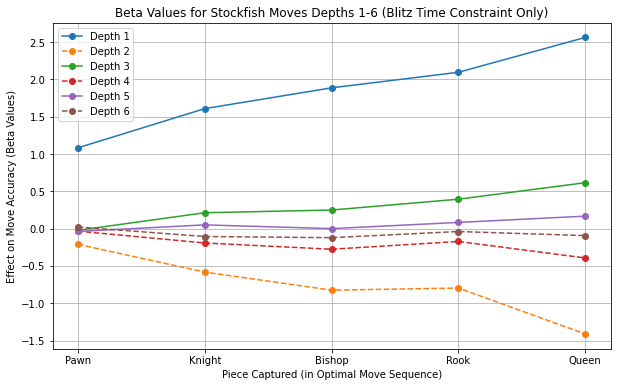

In [16]:
# create the line plot for all player data
# Depth labels
depth_labels = ['Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5', 'Depth 6']

# Pieces labels
piece_labels = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen']

# Adjust figure size
plt.figure(figsize=(10, 6))

# Plotting
for i in range(len(depth_labels)):
    if i % 2 == 0:
        plt.plot(piece_labels, beta_weights_blitz[i], marker='o', linestyle='-', label=depth_labels[i])
    else:
        plt.plot(piece_labels, beta_weights_blitz[i], marker='o', linestyle='--', label=depth_labels[i])

plt.xlabel('Piece Captured (in Optimal Move Sequence)')
plt.ylabel('Effect on Move Accuracy (Beta Values)')
plt.title('Beta Values for Stockfish Moves Depths 1-6 (Blitz Time Constraint Only)')
plt.legend()
plt.grid(True)
plt.show()

[  0  -1   1   3   5  -3  -9  -2  -4   2   8  -7   7  -5  -6   6   4   9
  -8  10 -10  15 -15  12 -12 -11 -14 -16  14  11  13  16 -13  17  19 -19
 -17 -18  18]


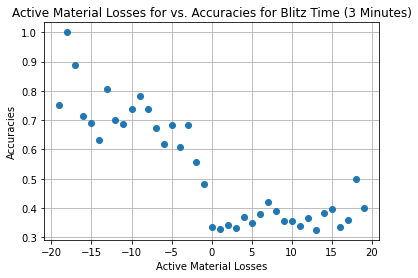

print: 0 245991 719809 0.3417448239741376
print: 1 15633 57113 0.27372051897116245
print: -1 40263 66463 0.6057957058814679
print: -3 33090 42655 0.775758996600633
print: 3 9082 30436 0.2983966355631489
print: 9 1566 6386 0.24522392734105858
print: -9 6046 7153 0.8452397595414511
print: -2 8038 10532 0.7631978731484999
print: 5 3303 10161 0.325066430469442
print: -5 10027 12262 0.817729571032458
print: -4 2340 2813 0.8318521151795236
print: 2 4671 12398 0.376754315212131
print: 6 938 2424 0.38696369636963696
print: 4 1525 3825 0.39869281045751637
print: 8 570 1425 0.4
print: -8 816 965 0.8455958549222798
print: -6 1482 1773 0.8358714043993232
[ 0  1 -1 -3  3  9 -9 -2  5 -5 -4  2  6  4  8 -8 -6]


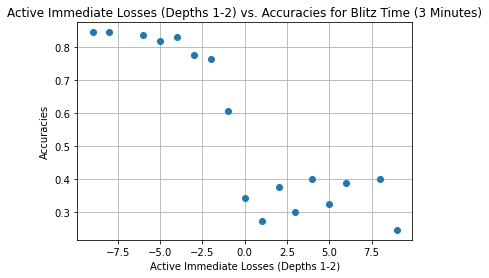

print: 0 281495 725070 0.3882314810983767
print: -1 24767 64924 0.3814768036473415
print: 1 23827 60179 0.39593545921334683
print: 5 3978 9485 0.41939905113336845
print: -9 3451 8606 0.40099930281199164
print: -3 13566 35795 0.3789914792568794
print: 3 11866 30099 0.3942323665238048
print: -2 4588 11304 0.4058740268931352
print: -5 5248 12410 0.42288477034649474
print: -8 440 1158 0.3799654576856649
print: 6 795 1965 0.40458015267175573
print: 9 2849 6437 0.44259748329967374
print: -4 1531 3582 0.42741485203796764
print: 2 3993 10371 0.3850159097483367
print: 4 1366 3205 0.42620904836193446
print: -6 1025 2392 0.42851170568561875
print: 8 596 1611 0.36995654872749845
[ 0 -1  1  5 -9 -3  3 -2 -5 -8  6  9 -4  2  4 -6  8]


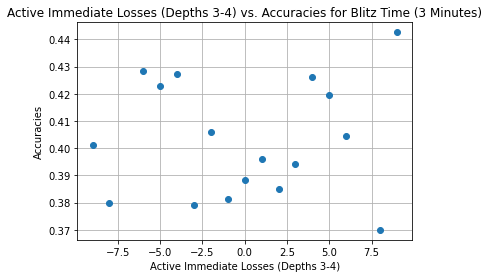

print: 0 280773 723104 0.38828854493959375
print: 3 12056 31647 0.38095238095238093
print: 1 26210 65457 0.4004155399728066
print: 4 1396 3542 0.39412761151891584
print: 5 3998 9802 0.40787594368496227
print: -5 4641 11374 0.4080358712853877
print: -1 25762 65145 0.395456289815028
print: -3 12604 32914 0.3829373518867351
print: -2 3900 10315 0.37809015996122153
print: 8 623 1583 0.39355653821857234
print: -4 1362 3389 0.401888462673355
print: 2 3782 10226 0.36984158028554664
print: -9 3518 8422 0.4177155070054619
print: 9 2885 6905 0.4178131788559015
print: 6 732 1792 0.40848214285714285
print: -6 685 1827 0.3749315818281336
print: -8 454 1149 0.3951261966927763
[ 0  3  1  4  5 -5 -1 -3 -2  8 -4  2 -9  9  6 -6 -8]


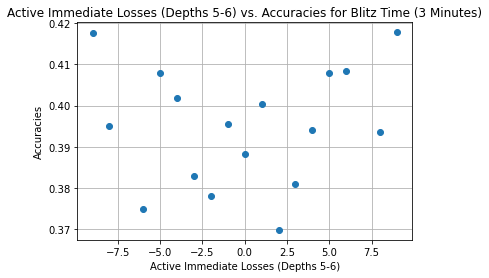

In [3]:
#------------------------plotting step---------------------------------
active_material_losses_blitz, accuracies_blitz = active_material_loss(combined_delta_materials_blitz, combined_move_matches_blitz)

plt.plot(active_material_losses_blitz, accuracies_blitz, marker='o', linestyle='')
print(active_material_losses_blitz)
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Material Losses')
plt.ylabel('Accuracies')
plt.title('Active Material Losses for vs. Accuracies for Blitz Time (3 Minutes)')
plt.grid(True)
plt.show()


active_immediate_losses_blitz, accuracies_ail_blitz = active_immediate_loss_1(combined_delta_materials_blitz, combined_move_matches_blitz)
print(active_immediate_losses_blitz)
plt.plot(active_immediate_losses_blitz, accuracies_ail_blitz, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 1-2)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 1-2) vs. Accuracies for Blitz Time (3 Minutes)')
plt.grid(True)
plt.show()

active_immediate_losses_2_blitz, accuracies_ail_2_blitz = active_immediate_loss_2(combined_delta_materials_blitz, combined_move_matches_blitz)
print(active_immediate_losses_2_blitz)
plt.plot(active_immediate_losses_2_blitz, accuracies_ail_2_blitz, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 3-4)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 3-4) vs. Accuracies for Blitz Time (3 Minutes)')
plt.grid(True)
plt.show()

active_immediate_losses_3_blitz, accuracies_ail_3_blitz = active_immediate_loss_3(combined_delta_materials_blitz, combined_move_matches_blitz)
print(active_immediate_losses_3_blitz)
plt.plot(active_immediate_losses_3_blitz, accuracies_ail_3_blitz, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 5-6)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 5-6) vs. Accuracies for Blitz Time (3 Minutes)')
plt.grid(True)
plt.show()

In [17]:
# Rapid time control: 10 minutes
# results_folder_only_time_rapid = '/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_4_only_time_rapid'
results_folder_only_time_rapid = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_rapid_time_translated'

job_indices_hm = defaultdict(list)
moves_per_run = 30000
n_total_runs = 300

for i in range(0, n_total_runs):
    start_idx = i * moves_per_run
    end_idx = ((i+1)*moves_per_run) - 1
    job_indices_hm[i] = [start_idx, end_idx]
    
# Iterate over the sorted hm and save the files
all_delta_materials_rapid = []
all_move_matches_rapid = []        
for job_idx, [start_idx, end_idx] in job_indices_hm.items():
    if job_idx in [0,1]:
        continue
        
    delta_materials_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_delta_materials.npy'
    move_match_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_move_match.npy'

    delta_materials_path_rapid = os.path.join(results_folder_only_time_rapid, delta_materials_file_name)
    # Load the delta_materials array from the file
    with open(delta_materials_path_rapid, 'rb') as f:
        delta_materials_rapid = np.load(f, allow_pickle=True)
        if delta_materials_rapid.shape[0] != 0:
            all_delta_materials_rapid.append(delta_materials_rapid)

    move_match_path_rapid = os.path.join(results_folder_only_time_rapid, move_match_file_name)
    # Load the move_mtach array from the file
    with open(move_match_path_rapid, 'rb') as f:
        move_matches_rapid = np.load(f, allow_pickle=True)
        if delta_materials_rapid.shape[0] != 0:
            all_move_matches_rapid.append(move_matches_rapid)
        
#     print("index:", job_idx)
#     print("shape 1:", delta_materials_rapid.shape[0])
#     print("shape 2:", move_matches_rapid.shape)
          
# Concatenate all delta_materials arrays into a single array
combined_delta_materials_rapid = np.concatenate(all_delta_materials_rapid)
print(combined_delta_materials_rapid.shape)
# print(combined_delta_materials)

# Concatenate all move_match arrays into a single array
combined_move_matches_rapid = np.concatenate(all_move_matches_rapid)
print(combined_move_matches_rapid.shape)
# print(combined_move_matches)

(1589504, 36)
(1589504,)


In [18]:
# remove 0th, 6th, 12th, 18th, 24th, 30th columns (all cases where nothing is captured across 6 depths)
# only need to run once every time combined_delta_materials is constructed from scratch
combined_delta_materials_rapid = np.delete(combined_delta_materials_rapid, [0,6,12,18,24,30], axis=1)

In [20]:
import numpy as np
import statsmodels.api as sm

# Reshape combined_move_match to match the shape of translated_delta_materials
combined_move_matches_rapid = combined_move_matches_rapid.reshape(-1, 1)

# Add constant term for intercept
combined_delta_materials_rapid_with_const = sm.add_constant(combined_delta_materials_rapid)
combined_delta_materials_rapid_with_const = np.array(combined_delta_materials_rapid_with_const, dtype=float)

# Create and fit the logistic regression model
logit_model_rapid = sm.Logit(combined_move_matches_rapid, combined_delta_materials_rapid_with_const)
logit_result_rapid = logit_model_rapid.fit()

# Retrieve the coefficients (beta weights) from the trained model
beta_weights_rapid = logit_result_rapid.params[1:]  # Exclude the intercept
intercept_rapid = logit_result_rapid.params[0]

# Reshape beta_weights for interpretation
beta_weights_rapid = beta_weights_rapid.reshape(6, 5)

print("Beta Weights:")
print(beta_weights_rapid)
print("Intercept:", intercept_rapid)

Optimization terminated successfully.
         Current function value: 0.622336
         Iterations 5
Beta Weights:
[[ 1.1157066   1.62764308  1.87994596  2.21134575  2.68872233]
 [-0.2994946  -0.71122368 -0.90954931 -0.88531478 -1.6517071 ]
 [-0.02350378  0.24659741  0.28623256  0.48519106  0.69054703]
 [-0.05833921 -0.24470732 -0.31628738 -0.20938633 -0.48939317]
 [-0.04219523  0.02815227  0.05165119  0.14129954  0.18287   ]
 [ 0.01627909 -0.13148104 -0.1507989  -0.05019821 -0.0906867 ]]
Intercept: -0.7025065193471678


In [21]:
print(logit_result_rapid.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:              1589504
Model:                          Logit   Df Residuals:                  1589473
Method:                           MLE   Df Model:                           30
Date:                Mon, 15 Apr 2024   Pseudo R-squ.:                 0.06940
Time:                        23:30:11   Log-Likelihood:            -9.8921e+05
converged:                       True   LL-Null:                   -1.0630e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7025      0.002   -281.706      0.000      -0.707      -0.698
x1             1.1157      0.006    202.701      0.000       1.105       1.126
x2             1.6276      0.009    191.179      0.0

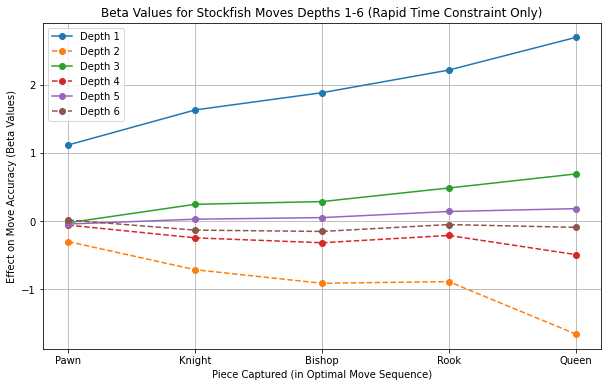

In [22]:
# create the line plot for all player data
# Depth labels
depth_labels = ['Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5', 'Depth 6']

# Pieces labels
piece_labels = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen']

# Adjust figure size
plt.figure(figsize=(10, 6))

# Plotting
for i in range(len(depth_labels)):
    if i % 2 == 0:
        plt.plot(piece_labels, beta_weights_rapid[i], marker='o', linestyle='-', label=depth_labels[i])
    else:
        plt.plot(piece_labels, beta_weights_rapid[i], marker='o', linestyle='--', label=depth_labels[i])

plt.xlabel('Piece Captured (in Optimal Move Sequence)')
plt.ylabel('Effect on Move Accuracy (Beta Values)')
plt.title('Beta Values for Stockfish Moves Depths 1-6 (Rapid Time Constraint Only)')
plt.legend()
plt.grid(True)
plt.show()

[  0  -1   1  -2   3  -3   9  -9   4   2  -4  -8  -6   5   6   8  -5 -13
  12   7 -12  -7  11 -10  14  10 -14 -11  13 -15 -17  17  15 -16  19  16
 -19  18 -18]


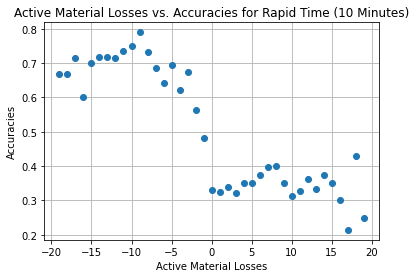

print: 0 392435 1150093 0.3412202317551711
print: 1 24153 92363 0.26150081742689174
print: -1 66406 106509 0.623477828164756
print: 3 14665 51398 0.28532238608506166
print: -3 54603 70250 0.7772669039145907
print: 2 7397 20880 0.3542624521072797
print: -9 9759 11240 0.8682384341637011
print: 5 5499 16916 0.3250768503192244
print: -6 2559 3003 0.8521478521478522
print: 9 2646 10880 0.2431985294117647
print: -2 13538 17549 0.7714399680893498
print: -5 16398 19472 0.8421322925225966
print: -4 3638 4299 0.8462433123982321
print: 8 883 2439 0.36203362033620334
print: 6 1726 4547 0.37959093908071256
print: 4 2212 6078 0.36393550510036193
print: -8 1374 1588 0.8652392947103275
[ 0  1 -1  3 -3  2 -9  5 -6  9 -2 -5 -4  8  6  4 -8]


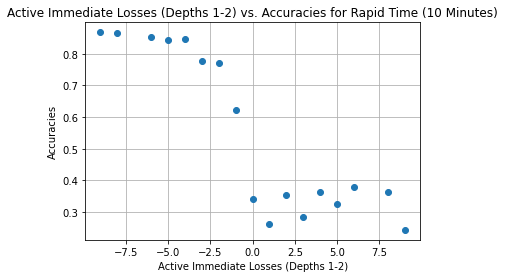

print: 0 449368 1155375 0.3889369252407227
print: -1 40296 105924 0.38042370001132886
print: -2 7677 18515 0.4146367809883878
print: -3 22910 60224 0.380413124335813
print: 9 4581 11095 0.4128886885984678
print: 2 6387 17045 0.37471399237312997
print: 1 38194 97277 0.3926313517069811
print: -9 5796 15042 0.3853211009174312
print: -4 2461 5908 0.41655382532159785
print: 3 19350 49181 0.3934446229234867
print: -6 1900 4331 0.4386977603324867
print: 5 6760 15598 0.4333888960123093
print: -5 9097 20542 0.4428487975854347
print: 4 2067 5213 0.39650872817955113
print: -8 692 1918 0.3607924921793535
print: 8 971 2732 0.3554172767203514
print: 6 1384 3584 0.3861607142857143
[ 0 -1 -2 -3  9  2  1 -9 -4  3 -6  5 -5  4 -8  8  6]


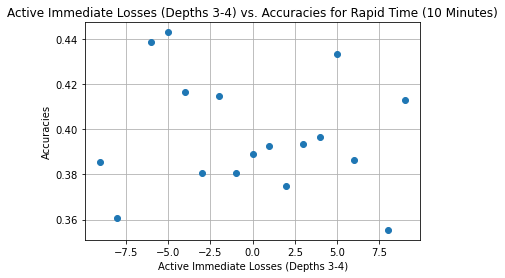

print: 0 449179 1156170 0.38850601555134623
print: 1 42699 105688 0.4040099159791083
print: -1 42088 105803 0.39779590370783435
print: 3 19442 51675 0.3762360909530721
print: 6 1253 3140 0.39904458598726117
print: -9 5745 14611 0.39319690644035316
print: 4 2227 5573 0.39960523954781985
print: -3 20456 53950 0.37916589434661724
print: -6 1219 3106 0.392466194462331
print: 8 1084 2695 0.4022263450834879
print: 5 6362 15725 0.4045786963434022
print: -5 7800 18541 0.42068928321018284
print: -2 6447 17251 0.37371746565416497
print: -8 789 2061 0.38282387190684136
print: 2 6229 16731 0.3723029107644492
print: 9 4753 11399 0.41696640056145273
print: -4 2119 5385 0.39350046425255336
[ 0  1 -1  3  6 -9  4 -3 -6  8  5 -5 -2 -8  2  9 -4]


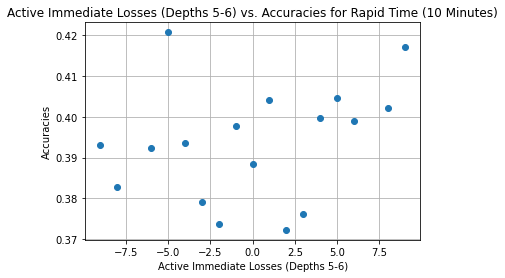

In [7]:
active_material_losses_rapid, accuracies_rapid = active_material_loss(combined_delta_materials_rapid, combined_move_matches_rapid)

plt.plot(active_material_losses_rapid, accuracies_rapid, marker='o', linestyle='')
print(active_material_losses_rapid)
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Material Losses')
plt.ylabel('Accuracies')
plt.title('Active Material Losses vs. Accuracies for Rapid Time (10 Minutes)')
plt.grid(True)
plt.show()


active_immediate_losses_rapid, accuracies_ail_rapid = active_immediate_loss_1(combined_delta_materials_rapid, combined_move_matches_rapid)
print(active_immediate_losses_rapid)
plt.plot(active_immediate_losses_rapid, accuracies_ail_rapid, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 1-2)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 1-2) vs. Accuracies for Rapid Time (10 Minutes)')
plt.grid(True)
plt.show()

active_immediate_losses_2_rapid, accuracies_ail_2_rapid = active_immediate_loss_2(combined_delta_materials_rapid, combined_move_matches_rapid)
print(active_immediate_losses_2_rapid)
plt.plot(active_immediate_losses_2_rapid, accuracies_ail_2_rapid, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 3-4)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 3-4) vs. Accuracies for Rapid Time (10 Minutes)')
plt.grid(True)
plt.show()

active_immediate_losses_3_rapid, accuracies_ail_3_rapid = active_immediate_loss_3(combined_delta_materials_rapid, combined_move_matches_rapid)
print(active_immediate_losses_3_rapid)
plt.plot(active_immediate_losses_3_rapid, accuracies_ail_3_rapid, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 5-6)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 5-6) vs. Accuracies for Rapid Time (10 Minutes)')
plt.grid(True)
plt.show()

In [23]:
# Bullet time control: 1 minute
# results_folder_only_time_bullet = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_4_only_time_bullet'
results_folder_only_time_bullet = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_bullet_time_translated'

job_indices_hm = defaultdict(list)
moves_per_run = 30000
n_total_runs = 300

for i in range(0, n_total_runs):
    start_idx = i * moves_per_run
    end_idx = ((i+1)*moves_per_run) - 1
    job_indices_hm[i] = [start_idx, end_idx]
    
# Iterate over the sorted hm and save the files
all_delta_materials_bullet = []
all_move_matches_bullet = []        
for job_idx, [start_idx, end_idx] in job_indices_hm.items():
    if job_idx == 0:
        continue
        
    delta_materials_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_delta_materials.npy'
    move_match_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_move_match.npy'

    delta_materials_path_bullet = os.path.join(results_folder_only_time_bullet, delta_materials_file_name)
    # Load the delta_materials array from the file
    with open(delta_materials_path_bullet, 'rb') as f:
        delta_materials_bullet = np.load(f, allow_pickle=True)
        if delta_materials_bullet.shape[0] != 0:
            all_delta_materials_bullet.append(delta_materials_bullet)

    move_match_path_bullet = os.path.join(results_folder_only_time_bullet, move_match_file_name)
    # Load the move_mtach array from the file
    with open(move_match_path_bullet, 'rb') as f:
        move_matches_bullet = np.load(f, allow_pickle=True)
        if delta_materials_bullet.shape[0] != 0:
            all_move_matches_bullet.append(move_matches_bullet)
        
# Concatenate all delta_materials arrays into a single array
combined_delta_materials_bullet = np.concatenate(all_delta_materials_bullet)
print(combined_delta_materials_bullet.shape)
# print(combined_delta_materials)

# Concatenate all move_match arrays into a single array
combined_move_matches_bullet = np.concatenate(all_move_matches_bullet)
print(combined_move_matches_bullet.shape)
# print(combined_move_matches)

(1050323, 36)
(1050323,)


In [24]:
# remove 0th, 6th, 12th, 18th, 24th, 30th columns (all cases where nothing is captured across 6 depths)
# only need to run once every time combined_delta_materials is constructed from scratch
combined_delta_materials_bullet = np.delete(combined_delta_materials_bullet, [0,6,12,18,24,30], axis=1)

In [26]:
import numpy as np
import statsmodels.api as sm

# Reshape combined_move_match to match the shape of translated_delta_materials
combined_move_matches_bullet = combined_move_matches_bullet.reshape(-1, 1)

# Add constant term for intercept
combined_delta_materials_bullet_with_const = sm.add_constant(combined_delta_materials_bullet)
combined_delta_materials_bullet_with_const = np.array(combined_delta_materials_bullet_with_const, dtype=float)

# Create and fit the logistic regression model
logit_model_bullet = sm.Logit(combined_move_matches_bullet, combined_delta_materials_bullet_with_const)
logit_result_bullet = logit_model_bullet.fit()

# Retrieve the coefficients (beta weights) from the trained model
beta_weights_bullet = logit_result_bullet.params[1:]  # Exclude the intercept
intercept_bullet = logit_result_bullet.params[0]

# Reshape beta_weights for interpretation
beta_weights_bullet = beta_weights_bullet.reshape(6, 5)

print("Beta Weights:")
print(beta_weights_bullet)
print("Intercept:", intercept_bullet)

Optimization terminated successfully.
         Current function value: 0.589078
         Iterations 5
Beta Weights:
[[ 1.04036659  1.68885831  1.91247581  1.92752251  2.34947782]
 [-0.09294015 -0.39215941 -0.65377017 -0.46681106 -1.02385107]
 [-0.13357823  0.08476947  0.05755606  0.11158525  0.2942882 ]
 [-0.00788044 -0.11783748 -0.19009775 -0.09108509 -0.24285155]
 [-0.10123984 -0.02755386 -0.04213485 -0.06073319  0.01676738]
 [ 0.03968623 -0.04914726 -0.09241777 -0.00306347 -0.0449666 ]]
Intercept: -1.0176795402690821


In [27]:
print(logit_result_bullet.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:              1050323
Model:                          Logit   Df Residuals:                  1050292
Method:                           MLE   Df Model:                           30
Date:                Mon, 15 Apr 2024   Pseudo R-squ.:                 0.07818
Time:                        23:32:09   Log-Likelihood:            -6.1872e+05
converged:                       True   LL-Null:                   -6.7120e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0177      0.003   -313.593      0.000      -1.024      -1.011
x1             1.0404      0.007    159.238      0.000       1.028       1.053
x2             1.6889      0.010    170.296      0.0

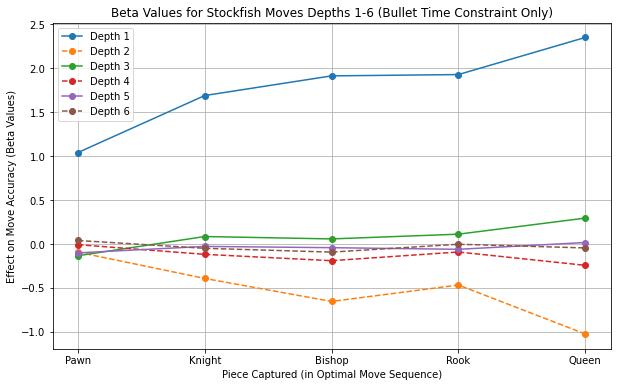

In [28]:
# create the line plot for all player data
# Depth labels
depth_labels = ['Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5', 'Depth 6']

# Pieces labels
piece_labels = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen']

# Adjust figure size
plt.figure(figsize=(10, 6))

# Plotting
for i in range(len(depth_labels)):
    if i % 2 == 0:
        plt.plot(piece_labels, beta_weights_bullet[i], marker='o', linestyle='-', label=depth_labels[i])
    else:
        plt.plot(piece_labels, beta_weights_bullet[i], marker='o', linestyle='--', label=depth_labels[i])

plt.xlabel('Piece Captured (in Optimal Move Sequence)')
plt.ylabel('Effect on Move Accuracy (Beta Values)')
plt.title('Beta Values for Stockfish Moves Depths 1-6 (Bullet Time Constraint Only)')
plt.legend()
plt.grid(True)
plt.show()

[  0   1  -3  -1  -9   2   3  -2  -4   4  -5  -6  -7   5 -10   8  -8   7
   6 -11   9 -15  10 -12 -14 -17  11 -13  13  18  14  12  15 -16  17  16
 -20 -19 -18  19]


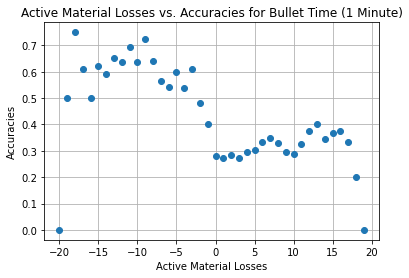

print: 0 209423 744587 0.2812606183024952
print: 1 12601 57550 0.21895742832319723
print: -1 40918 81460 0.5023078811686718
print: 6 973 2448 0.3974673202614379
print: -8 988 1273 0.7761194029850746
print: -3 39779 56541 0.7035425620346297
print: 3 6837 28594 0.23910610617612085
print: -2 8907 13092 0.6803391384051329
print: -5 11618 16279 0.7136802014865778
print: -9 7652 10009 0.7645119392546708
print: 9 1110 5183 0.21416168242330696
print: -4 2521 3341 0.7545645016462137
print: 2 3698 11815 0.3129919593736775
print: 5 2762 9861 0.28009329682587975
print: -6 2475 3409 0.7260193605162805
print: 4 1088 3158 0.34452184927169094
print: 8 632 1723 0.3668020893789901
[ 0  1 -1  6 -8 -3  3 -2 -5 -9  9 -4  2  5 -6  4  8]


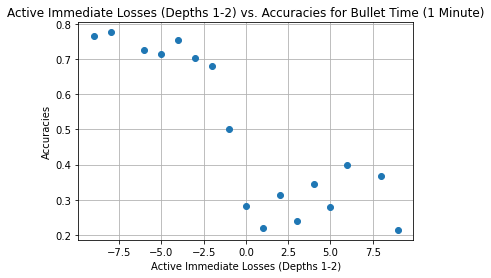

print: 0 262724 775645 0.3387168098808089
print: 1 21886 64830 0.3375906216257905
print: 2 3272 10405 0.31446419990389235
print: -9 2821 8282 0.34061820816227967
print: -1 22720 70768 0.32104906172281256
print: -3 11701 36680 0.31900218102508177
print: 3 10268 30284 0.3390569277506274
print: -2 3832 11623 0.32969112965671515
print: 4 956 2833 0.337451464878221
print: -5 4644 12995 0.3573682185455945
print: 5 3515 9754 0.36036497847037113
print: -4 1186 3372 0.3517200474495848
print: 9 2169 5888 0.36837635869565216
print: 8 509 1658 0.30699638118214717
print: -6 815 2433 0.3349773941635841
print: 6 614 1846 0.3326110509209101
print: -8 350 1027 0.34079844206426485
[ 0  1  2 -9 -1 -3  3 -2  4 -5  5 -4  9  8 -6  6 -8]


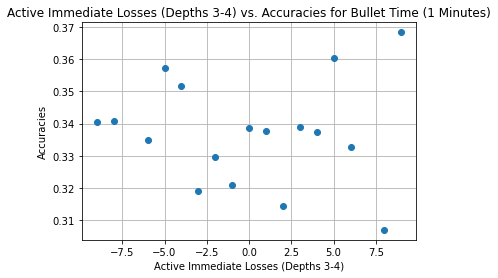

print: 0 260680 772096 0.33762640915119363
print: -1 23459 69679 0.33667245511560157
print: -2 3264 10267 0.31791175611181455
print: 2 3380 10710 0.31559290382819793
print: 3 10924 33287 0.3281761648691681
print: 1 24755 71757 0.34498376465013864
print: -3 10897 33556 0.32474073191083563
print: -4 1085 3233 0.3356016084132385
print: 4 1066 3246 0.3284041897720271
print: -5 4002 11865 0.3372945638432364
print: 5 3584 10352 0.3462132921174652
print: 9 2177 6134 0.3549070753179002
print: -9 2659 7883 0.33730813142204746
print: 8 567 1710 0.33157894736842103
print: -6 529 1750 0.30228571428571427
print: 6 583 1692 0.34456264775413714
print: -8 371 1106 0.33544303797468356
[ 0 -1 -2  2  3  1 -3 -4  4 -5  5  9 -9  8 -6  6 -8]


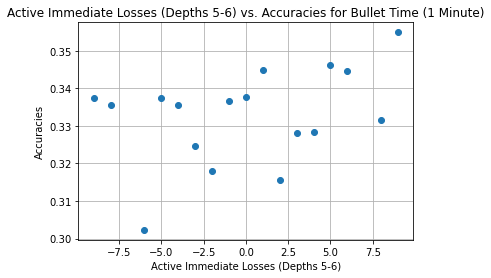

In [5]:
active_material_losses_bullet, accuracies_bullet = active_material_loss(combined_delta_materials_bullet, combined_move_matches_bullet)
plt.plot(active_material_losses_bullet, accuracies_bullet, marker='o', linestyle='')
print(active_material_losses_bullet)
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Material Losses')
plt.ylabel('Accuracies')
plt.title('Active Material Losses vs. Accuracies for Bullet Time (1 Minute)')
plt.grid(True)
plt.show()


active_immediate_losses_bullet, accuracies_ail_bullet = active_immediate_loss_1(combined_delta_materials_bullet, combined_move_matches_bullet)
print(active_immediate_losses_bullet)
plt.plot(active_immediate_losses_bullet, accuracies_ail_bullet, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 1-2)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 1-2) vs. Accuracies for Bullet Time (1 Minute)')
plt.grid(True)
plt.show()

active_immediate_losses_2_bullet, accuracies_ail_2_bullet = active_immediate_loss_2(combined_delta_materials_bullet, combined_move_matches_bullet)
print(active_immediate_losses_2_bullet)
plt.plot(active_immediate_losses_2_bullet, accuracies_ail_2_bullet, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 3-4)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 3-4) vs. Accuracies for Bullet Time (1 Minutes)')
plt.grid(True)
plt.show()

active_immediate_losses_3_bullet, accuracies_ail_3_bullet = active_immediate_loss_3(combined_delta_materials_bullet, combined_move_matches_bullet)
print(active_immediate_losses_3_bullet)
plt.plot(active_immediate_losses_3_bullet, accuracies_ail_3_bullet, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 5-6)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 5-6) vs. Accuracies for Bullet Time (1 Minute)')
plt.grid(True)
plt.show()

Correlation Coefficient Bullet:  -0.6208639431798874
Correlation Coefficient Blitz:  -0.8525806585745281
Correlation Coefficient Rapid:  -0.8703479108218435
P Value Bullet:  1.9167717186859933e-05
P Value Blitz:  5.6521186517756575e-12
P Value Rapid:  6.147512345669348e-13


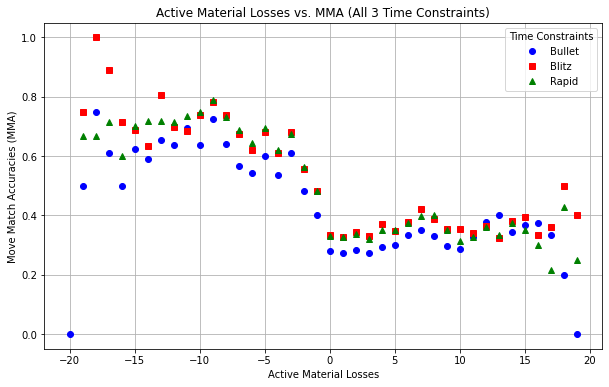

Correlation Coefficient Bullet:  -0.8496434998731046
Correlation Coefficient Blitz:  -0.875284386726044
Correlation Coefficient Rapid:  -0.8836932786700067
P Value Bullet:  1.5834646935161133e-05
P Value Blitz:  4.211236182456677e-06
P Value Rapid:  2.5588706959592744e-06


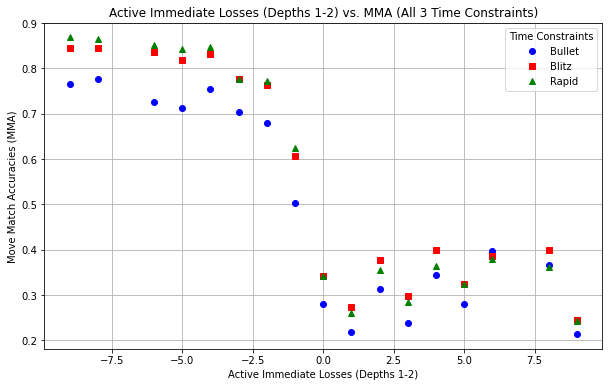

Correlation Coefficient Bullet:  -0.02160021310624738
Correlation Coefficient Blitz:  0.07881905848411658
Correlation Coefficient Rapid:  -0.11928138962844388
P Value Bullet:  0.9344199253322522
P Value Blitz:  0.7636481928455515
P Value Rapid:  0.6484024252935057


<Figure size 720x432 with 0 Axes>

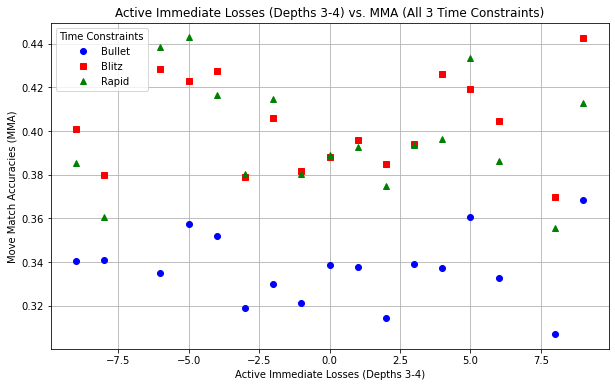

Correlation Coefficient Bullet:  0.3705880624531829
Correlation Coefficient Blitz:  0.11167794698348552
Correlation Coefficient Rapid:  0.28388487504770865
P Value Bullet:  0.143104604369832
P Value Blitz:  0.6695788645253078
P Value Rapid:  0.2694861101199071


<Figure size 720x432 with 0 Axes>

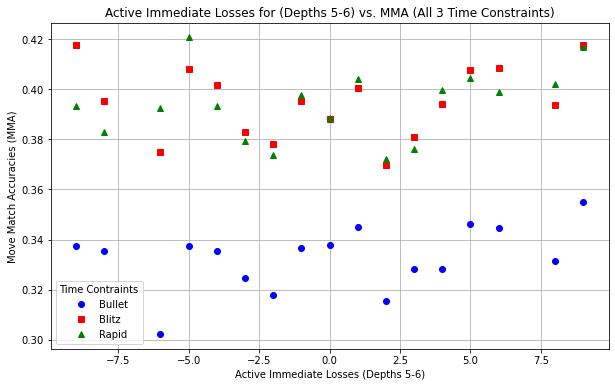

In [10]:
# merged plots across elo groups (4 plots total)
active_material_losses_bullet, accuracies_bullet, corr_co_losses_bullet, p_val_losses_bullet = active_material_loss(combined_delta_materials_bullet, combined_move_matches_bullet)
active_material_losses_blitz, accuracies_blitz, corr_co_losses_blitz, p_val_losses_blitz = active_material_loss(combined_delta_materials_blitz, combined_move_matches_blitz)
active_material_losses_rapid, accuracies_rapid, corr_co_losses_rapid, p_val_losses_rapid = active_material_loss(combined_delta_materials_rapid, combined_move_matches_rapid)
print("Correlation Coefficient Bullet: ", corr_co_losses_bullet)
print("Correlation Coefficient Blitz: ", corr_co_losses_blitz)
print("Correlation Coefficient Rapid: ", corr_co_losses_rapid)
print("P Value Bullet: ", p_val_losses_bullet)
print("P Value Blitz: ", p_val_losses_blitz)
print("P Value Rapid: ", p_val_losses_rapid)
plt.figure(figsize=(10, 6))
plt.plot(active_material_losses_bullet, accuracies_bullet, marker='o', label='Bullet', color='blue', linestyle='')
plt.plot(active_material_losses_blitz, accuracies_blitz, marker='s', label='Blitz', color='red', linestyle='')
plt.plot(active_material_losses_rapid, accuracies_rapid, marker='^', label='Rapid', color='green', linestyle='')
plt.xlabel('Active Material Losses')
plt.ylabel('Move Match Accuracies (MMA)')
plt.title('Active Material Losses vs. MMA (All 3 Time Constraints)')
plt.legend(title='Time Constraints')
plt.grid(True)
plt.show()


active_immediate_losses_bullet, accuracies_ail_bullet, corr_co_ail_bullet, p_val_ail_bullet = active_immediate_loss_1(combined_delta_materials_bullet, combined_move_matches_bullet)
active_immediate_losses_blitz, accuracies_ail_blitz, corr_co_ail_blitz, p_val_ail_blitz = active_immediate_loss_1(combined_delta_materials_blitz, combined_move_matches_blitz)
active_immediate_losses_rapid, accuracies_ail_rapid, corr_co_ail_rapid, p_val_ail_rapid = active_immediate_loss_1(combined_delta_materials_rapid, combined_move_matches_rapid)
print("Correlation Coefficient Bullet: ", corr_co_ail_bullet)
print("Correlation Coefficient Blitz: ", corr_co_ail_blitz)
print("Correlation Coefficient Rapid: ", corr_co_ail_rapid)
print("P Value Bullet: ", p_val_ail_bullet)
print("P Value Blitz: ", p_val_ail_blitz)
print("P Value Rapid: ", p_val_ail_rapid)
plt.figure(figsize=(10, 6))
plt.plot(active_immediate_losses_bullet, accuracies_ail_bullet, marker='o', label='Bullet', color='blue', linestyle='')
plt.plot(active_immediate_losses_blitz, accuracies_ail_blitz, marker='s', label='Blitz', color='red', linestyle='')
plt.plot(active_immediate_losses_rapid, accuracies_ail_rapid, marker='^', label='Rapid', color='green', linestyle='')
plt.xlabel('Active Immediate Losses (Depths 1-2)')
plt.ylabel('Move Match Accuracies (MMA)')
plt.title('Active Immediate Losses (Depths 1-2) vs. MMA (All 3 Time Constraints)')
plt.legend(title='Time Constraints')
plt.grid(True)
plt.show()

active_immediate_losses_2_bullet, accuracies_ail_2_bullet, corr_co_ail_2_bullet, p_val_ail_2_bullet = active_immediate_loss_2(combined_delta_materials_bullet, combined_move_matches_bullet)
active_immediate_losses_2_blitz, accuracies_ail_2_blitz, corr_co_ail_2_blitz, p_val_ail_2_blitz = active_immediate_loss_2(combined_delta_materials_blitz, combined_move_matches_blitz)
active_immediate_losses_2_rapid, accuracies_ail_2_rapid, corr_co_ail_2_rapid, p_val_ail_2_rapid = active_immediate_loss_2(combined_delta_materials_rapid, combined_move_matches_rapid)
print("Correlation Coefficient Bullet: ", corr_co_ail_2_bullet)
print("Correlation Coefficient Blitz: ", corr_co_ail_2_blitz)
print("Correlation Coefficient Rapid: ", corr_co_ail_2_rapid)
print("P Value Bullet: ", p_val_ail_2_bullet)
print("P Value Blitz: ", p_val_ail_2_blitz)
print("P Value Rapid: ", p_val_ail_2_rapid)
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.plot(active_immediate_losses_2_bullet, accuracies_ail_2_bullet, marker='o', label='Bullet', color='blue', linestyle='')
plt.plot(active_immediate_losses_2_blitz, accuracies_ail_2_blitz, marker='s', label='Blitz', color='red', linestyle='')
plt.plot(active_immediate_losses_2_rapid, accuracies_ail_2_rapid, marker='^', label='Rapid', color='green', linestyle='')
plt.xlabel('Active Immediate Losses (Depths 3-4)')
plt.ylabel('Move Match Accuracies (MMA)')
plt.title('Active Immediate Losses (Depths 3-4) vs. MMA (All 3 Time Constraints)')
plt.legend(title='Time Constraints')
plt.grid(True)
plt.show()

active_immediate_losses_3_bullet, accuracies_ail_3_bullet, corr_co_ail_3_bullet, p_val_ail_3_bullet = active_immediate_loss_3(combined_delta_materials_bullet, combined_move_matches_bullet)
active_immediate_losses_3_blitz, accuracies_ail_3_blitz, corr_co_ail_3_blitz, p_val_ail_3_blitz = active_immediate_loss_3(combined_delta_materials_blitz, combined_move_matches_blitz)
active_immediate_losses_3_rapid, accuracies_ail_3_rapid, corr_co_ail_3_rapid, p_val_ail_3_rapid = active_immediate_loss_3(combined_delta_materials_rapid, combined_move_matches_rapid)
print("Correlation Coefficient Bullet: ", corr_co_ail_3_bullet)
print("Correlation Coefficient Blitz: ", corr_co_ail_3_blitz)
print("Correlation Coefficient Rapid: ", corr_co_ail_3_rapid)
print("P Value Bullet: ", p_val_ail_3_bullet)
print("P Value Blitz: ", p_val_ail_3_blitz)
print("P Value Rapid: ", p_val_ail_3_rapid)
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.plot(active_immediate_losses_3_bullet, accuracies_ail_3_bullet, marker='o', label='Bullet', color='blue', linestyle='')
plt.plot(active_immediate_losses_3_blitz, accuracies_ail_3_blitz, marker='s', label='Blitz', color='red', linestyle='')
plt.plot(active_immediate_losses_3_rapid, accuracies_ail_3_rapid, marker='^', label='Rapid', color='green', linestyle='')
plt.xlabel('Active Immediate Losses (Depths 5-6)')
plt.ylabel('Move Match Accuracies (MMA)')
plt.title('Active Immediate Losses for (Depths 5-6) vs. MMA (All 3 Time Constraints)')
plt.legend(title='Time Contraints')
plt.grid(True)
plt.show()